<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

Calderón Oñate Paola Fernanda

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [7]:
# Escriba aquí su código para el ejercicio 1
import miningscience as msc
help (msc.download_pubmed)
help (msc.mining_pubs)


Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    Esta función realiza un conteo de los articulos en la base de Pubmed mediante el comando Entrez

Help on function mining_pubs in module miningscience:

mining_pubs(tipo)
    La funcion mining_pubs encuentra  documentos en base a la PIMD encontrados en download_pubmed ademas a base de una variable tipo puede realizar tres diferentes tipos de filtrado como por año, paises y autores




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [53]:
# Escriba aquí su código para el ejercicio 2
import miningscience as msc
a = msc.download_pubmed("Ecuador genomics")
b = a ["Count"]
print ('El número de artículos es:', b)
print ("El PMID del primer articulo es:", a['IdList'][0])

El número de artículos es: 193
El PMID del primer articulo es: 35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [63]:
# Escriba aquí su código para el ejercicio 3
#Creando las DataSets 
pub_year = msc.mining_pubs('DP')
coutries = msc.mining_pubs('AD')
pub_authors = msc.mining_pubs('AU') 
  
print('Primeros y Ultimos dos registros de los años')
display(pub_year.head(2)) 
display(pub_year.tail(2))

print('Primeros y Ultimos dos registros de los autores')
display(pub_authors.head(2))
display(pub_authors.tail(2))

print('Primeros y Ultimos dos registros de paises')
display(coutries.head(2))
display(coutries.tail(2))



Primeros y Ultimos dos registros de los años


,Pmid,DpYear
0,PMID- 35120121,2022
1,PMID- 35064679,2022


,Pmid,DpYear
53,PMID- 19844075,2010
54,PMID- 19018989,2008


Primeros y Ultimos dos registros de los autores


,Pmid,NrAutor


,Pmid,NrAutor


Primeros y Ultimos dos registros de paises


,Country,NrAutor
0,United States,14
1,England,7


,Country,NrAutor
52,England,2
53,Switzerland,7


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es de 4.583333333333333 con una desviacion estandar de 4.581749037477309


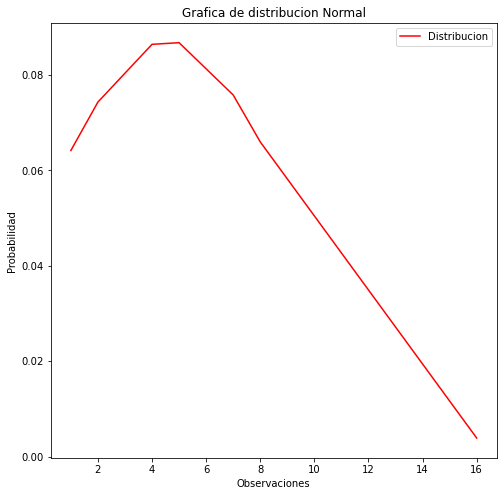

In [58]:
# Escriba aquí su código para el ejercicio 4
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.stats import norm 
import numpy as np 
import statistics 
import pandas as pd
pub_year['NrAutores'] = pd.to_datetime(pub_year['DpYear'], infer_datetime_format=True)
years =  pub_year['NrAutores'].dt.strftime('%Y')
years = pd.DataFrame(years, columns = ['NrAutores'])
years_1=  pd.DataFrame(years["NrAutores"].value_counts())
years_2 = pd.DataFrame(years_1.rename_axis(columns="DpYear"))

DesviacionEstandar = years_1.NrAutores.std()
CalculoMedia =       years_2['NrAutores'].mean()
Datos=          list(years_2['NrAutores'])

fig, axu = plt.subplots(figsize=(10, 10))
x_axis=    list(years_2['NrAutores'])

axu.set_title('Grafica de distribucion Normal')
Grafico1, = axu.plot(x_axis, norm.pdf(Datos, CalculoMedia, DesviacionEstandar), 'C1', label='Distribucion', color = 'red')
plt.xlabel("Observaciones")
plt.ylabel("Probabilidad")
axu.legend(handles=[Grafico1])
GraficaParametros = plt.gcf()
plSize = GraficaParametros.get_size_inches()
GraficaParametros.set_size_inches( 8, 8)

print("La media es de "+ str(CalculoMedia)+" con una desviacion estandar de "+ str(DesviacionEstandar))

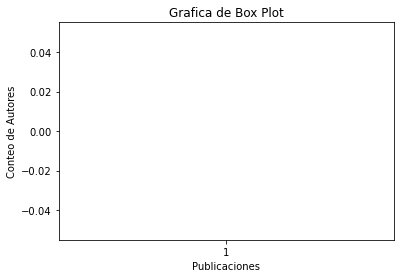

In [65]:
# GRAFICO PUB_AUTHPORS
autores=list(pub_authors['NrAutor'])
plt.title("Grafica de Box Plot")
plt.xlabel("Publicaciones")
plt.ylabel("Conteo de Autores")
plt.boxplot(autores)
plt.show ()


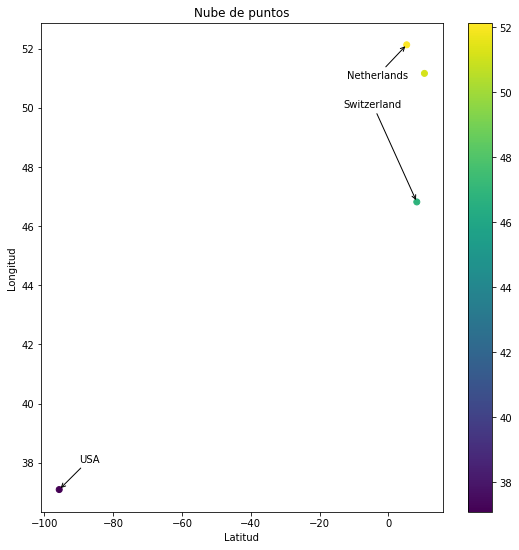

In [70]:
conti = coutries['Country'].tolist()
conti_fil = list() 
for continente in conti:
    if continente not in conti_fil:
        conti_fil.append(continente)  
Latidud = pd.read_csv('./data/paises.csv', engine='python')
paises = Latidud[Latidud.name.isin(conti_fil)]

plt.scatter(paises.longitude, paises.latitude, c=paises.latitude)
plt.colorbar()
ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024),xytext = (-90, 38), arrowprops = ard)
plt.annotate('Netherlands', xy = (5.291266, 52.132633),xytext = (-12, 51), arrowprops = ard)
plt.annotate('Switzerland', xy = (8.227512, 46.818188),xytext = (-13, 50), arrowprops = ard)


plt.title("Nube de puntos")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
GraficaParametros = plt.gcf()
plSize = GraficaParametros.get_size_inches()
GraficaParametros.set_size_inches( 9, 9 )


## Ejercicio 5 [1 punto]
Se puede observar que existe una media de 4 articulos publicados por año y su dispersion es la mis En el grafico de nubes, se visualiza paises desarrollados con mayor numero de autores, entre ellos Estados Unidos, Portugal y Suiza

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [73]:
# Escriba aquí su código para el ejercicio 6
from Bio import Entrez 
from Bio import SeqIO
import pandas as pd
from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os
import matplotlib
import matplotlib.pyplot as plt

record_gb = pd.read_csv("pristi_mut.seq")
Entrez.email = "paocalderon301@gmail.com"
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id = record_gb[0:10]) as handle:
    for seq_record in SeqIO.parse(handle, "gb"):
        print (len (record_gb))
        print("%s %s..." % (seq_record.id, seq_record.description[:50])) 
        print( "Sequence length %i, %i features, from: %s" % ( len(seq_record), 
                                                              len(seq_record.features), 
                                                            seq_record.annotations["source"], ) )
        ids_prist = record_gb [0:10]
        print (ids_prist)
print ()
#############################################


with open("Pristi.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

pristi_tree = constructor.build_tree(alignment)
pristi_tree.rooted = True
Phylo.draw_ascii(pristi_tree)


13
KM675463.1 Pristimantis sp. CRH-2015 voucher MZUTI 909 16S ri...
Sequence length 847, 2 features, from: mitochondrion Pristimantis mutabilis
   KM675463.1
0  KM675462.1
1  KM675461.1
2  KM675460.1
3  KM675459.1
4  KM675458.1
5  KM675457.1
6  KM675440.1
7  KM675439.1
8  KM675438.1
9  KM675437.1

 , KM675437.1
 |
 | KM675436.1
 |
 , KM675438.1
 |
 | KM675439.1
 |
_|, KM675434.1
 ,|
 || KM675435.1
 |
 |                                                             , KM675457.1
 |                                                           __|
 |                                                          |  | KM675458.1
 |                                                          |
 |   _______________________________________________________|  , KM675460.1
 |  |                                                       |  |
 |  |                                                       |  | , KM675461.1
 |  |                                                       |__| |
 |  |                          

Se puede observar que en la parte intermedia del arbol filogenetico donde se encuentra KM675461.1, KM675462.1,  KM675459.1 poseen mayor parentesco que en comparacion del resto de grupos. Los grupos KM675463.1,KM675460.1, KM675458.1, KM675457.1  presentan un evento de divergencia, a su vez poseen un ancestro en comun con el primer grupo mencionado

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```